In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def bollinger_bands(data, window_size = 30):
  rolling_mean = data['Close'].rolling(window=window_size).mean()
  rolling_std = data['Close'].rolling(window=window_size).std()
  data['UpperBand']=rolling_mean+(2*rolling_std)
  data['LowerBand']=rolling_mean-(2*rolling_std)
  return data



In [3]:
def RSI(data, window=13):
  delta=data['Close'].diff()
  gain=delta.where(delta>0,0)
  loss=delta.where(delta<0,0)
  avg_gain=gain.rolling(window).mean()
  avg_loss=loss.rolling(window).mean()
  RS= avg_gain/avg_loss
  RSI=100-(100/(1+RS))
  data['RSI']=RSI
  data['Overbought']=70
  data['Oversold']=30
  return data

In [32]:
def strategy(data):
  pos=0
  buy_price=[]
  sell_price=[]
  for i in data.index:  # Iterate using index
    if data['Close'][i]< data['LowerBand'][i] and data['RSI'][i]<data['Oversold'][i] and pos==0:
      pos=1
      buy_price.append(data['Close'][i])
      sell_price.append(np.nan)
    elif data['Close'][i]>data['UpperBand'][i] and data['RSI'][i]>data['Overbought'][i] and pos==1:
      pos=0
      sell_price.append(data['Close'][i])
      buy_price.append(np.nan)
    else:
      buy_price.append(np.nan)
      sell_price.append(np.nan)

  # Check for empty lists and handle accordingly (e.g., assign np.nan)
  if not buy_price:
    buy_price = [np.nan] * len(data)
  if not sell_price:
    sell_price = [np.nan] * len(data)

  return (buy_price,sell_price)

In [33]:
import yfinance as yf

In [34]:
ticker=yf.Ticker('AAPL')
data=ticker.history(start='2018-07-03',end='2023-07-03')

In [35]:
data=bollinger_bands(data)
data=RSI(data)

In [36]:
buy_price, sell_price= strategy(data)
data['Buy']=buy_price
data['Sell']=sell_price


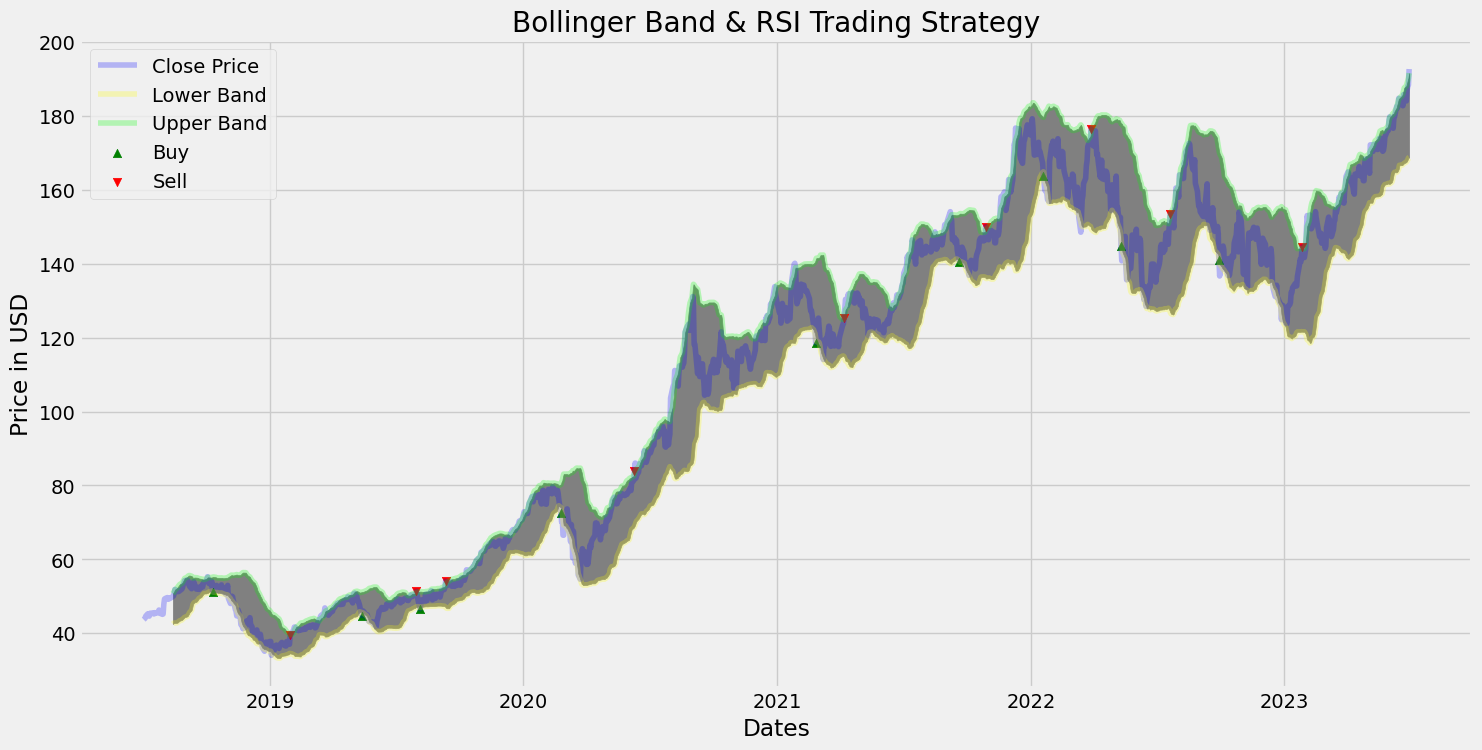

In [42]:
fig,ax=plt.subplots(figsize=(16,8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(data['Close'], label='Close Price',alpha=0.25,color='blue')
ax.plot(data['LowerBand'], label='Lower Band',alpha=0.25,color='yellow')
ax.plot(data['UpperBand'], label='Upper Band',alpha=0.25,color='lime')
ax.fill_between(data.index,data['UpperBand'], data['LowerBand'],color='grey')
ax.scatter(data.index, data['Buy'], label='Buy', alpha=1, marker='^', color='green')
ax.scatter(data.index, data['Sell'], label='Sell', alpha=1, marker='v', color='red')
plt.legend()
plt.show()
